In [20]:
#importing packages
import numpy as np
import cv2
#%matplotlib inline
import matplotlib.pyplot as plt

In [21]:
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
	"bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
	"dog", "horse", "motorbike", "person", "pottedplant", "sheep",
	"sofa", "train", "tvmonitor"]
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

In [22]:
#loading the model
prototxt = 'MobileNetSSD_deploy.prototxt'
model = 'MobileNetSSD_deploy.caffemodel'
net = cv2.dnn.readNet(config=prototxt, model=model)

In [23]:
#importing and processing image
img = cv2.imread("/content/example_06.jpg")
blob = cv2.dnn.blobFromImage(cv2.resize(img,(300,300)),0.007843,(300,300),127.5)

(530, 600, 3)
(1, 3, 300, 300)
530 600


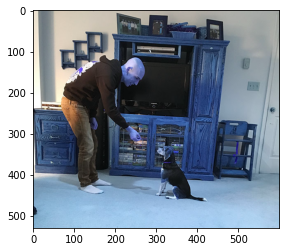

In [24]:
print(img.shape)
print(blob.shape)
(h,w)=img.shape[:2]
print(h,w)
plt.imshow(img)

In [25]:
#predicting using the model
net.setInput(blob)
detections=net.forward()


In [26]:
#no. of detections
print(detections.shape[2])

100


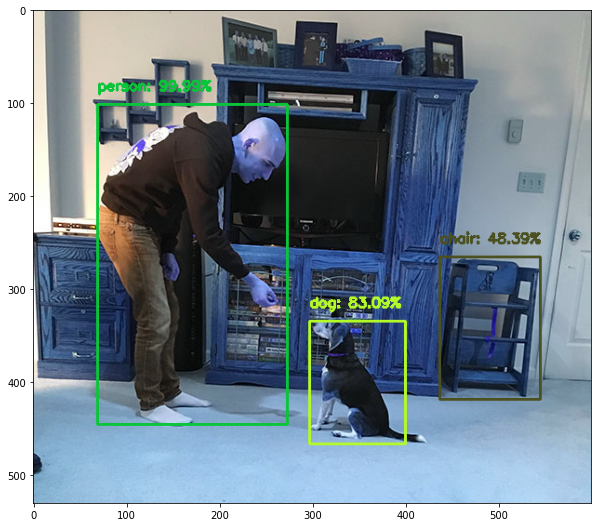

In [27]:
#setting the confidence for selection
confi= 0.3

#displaying the results on the image
for i in range(0,detections.shape[2]):
  if detections[0,0,i,2]>confi:
    idx=int(detections[0,0,i,1])
    box=detections[0,0,i,3:7]*np.array([w,h,w,h])
    (startx,starty,endx,endy)=box.astype("int")
    label =("{}: {:.2f}%".format(CLASSES[idx],detections[0,0,i,2]*100))
    cv2.rectangle(img,(startx,starty),(endx,endy),COLORS[idx],2)
    y=starty-15 if starty-15>15 else starty+15
    cv2.putText(img,label,(startx,y),cv2.FONT_HERSHEY_SIMPLEX,0.5,COLORS[idx],2)

#show the output
fig = plt.figure(figsize=(10,10))
plt.imshow(img)

